In [1]:
import os
wd = '/Users/masaver/Desktop/masaver/data_science_projects/sep24_bds_int_medical'
os.chdir( wd )

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def load_model_data( model_id ):

    '''
    This function loads the previosly trained model and the target and feature variables used during training
    model_id can be  1 or 2 
    '''
    #import libraries
    import pandas as pd 
    import joblib

    # read data
    train_file_name = f'./src/models/model_{model_id}/data/X_train.csv'
    test_file_name = f'./src/models/model_{model_id}/data/y_train.csv'
    timestamps_file_name = f'./src/models/model_{model_id}/data/timestamps_ids.csv'

    features = pd.read_csv( train_file_name , index_col=0 )
    target = pd.read_csv( test_file_name , index_col=0 )
    time_stamps_df = pd.read_csv( timestamps_file_name , index_col=0 )

    # load the trained model
    model_pkl = f'./src/models/model_{model_id}/model/model.pkl'
    model = joblib.load(model_pkl)

    return model , features , target, time_stamps_df

In [ ]:
# Read the data from models 1 & 2
model_1 , features_1 , target_1 , timeStamps_1 = load_model_data( 1 )
model_2 , features_2 , target_2 , timeStamps_2 = load_model_data( 2 )

In [11]:
# Parse the data from the models & generate predictions
# NOTE: here you can only join points from the train.csv, because augmented points are not present in Model 1

pred_df_1 = target_1.copy()
pred_df_1['bg+1:00_pred'] = model_1.predict( features_1 )
pred_df_1['abs_error'] = abs(pred_df_1['bg+1:00_pred']-pred_df_1['bg+1:00'])
pred_df_1 = pred_df_1.join( timeStamps_1 )
pred_df_1.index = pd.MultiIndex.from_arrays([pred_df_1.index, pred_df_1['time']], names=['id', 'time'])
pred_df_1 = pred_df_1.drop( 'time' , axis = 1 )

pred_df_2 = target_2.copy()
pred_df_2['bg+1:00_pred'] = model_2.predict( features_2 )
pred_df_2['abs_error'] = abs(pred_df_2['bg+1:00_pred']-pred_df_2['bg+1:00'])
pred_df_2 = pred_df_2.join( timeStamps_2 )
pred_df_2.index = pd.MultiIndex.from_arrays([pred_df_2.index, pred_df_2['time']], names=['id', 'time'])
pred_df_2 = pred_df_2.drop( 'time' , axis = 1 )

# Join predictions
common_preds_df = pred_df_1.join( pred_df_2 , lsuffix='_m1', rsuffix='_m2' )

# If needed, add a column with patient ids
p_ids = common_preds_df.index.get_level_values('id').tolist()
p_ids = [id.split('_')[0] for id in p_ids]
common_preds_df['p_id'] = p_ids

In [12]:
# Display common_preds_df
display( common_preds_df.head() )

,,bg+1:00_m1,bg+1:00_pred_m1,abs_error_m1,bg+1:00_m2,bg+1:00_pred_m2,abs_error_m2,p_id
id,time,,,,,,,
p01_0,06:10:00,13.4,12.697314,0.702686,13.4,12.096037,1.303963,p01
p01_1,06:25:00,12.8,12.996518,0.196518,12.8,12.358576,0.441424,p01
p01_2,06:40:00,15.5,12.688621,2.811379,15.5,12.377337,3.122663,p01
p01_3,06:55:00,14.8,12.903560,1.896440,14.8,12.716197,2.083803,p01
p01_4,07:10:00,12.7,11.640526,1.059474,12.7,12.049277,0.650723,p01


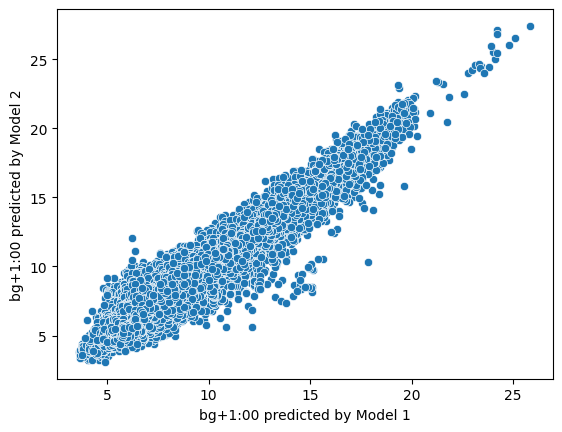

In [13]:
# Create a scatterplot of predicted bg+1:00
sns.scatterplot(data=common_preds_df, x='bg+1:00_pred_m1', y='bg+1:00_pred_m2')

# Add labels and title
plt.xlabel('bg+1:00 predicted by Model 1')
plt.ylabel('bg+1:00 predicted by Model 2')

# Show the plot
plt.show()

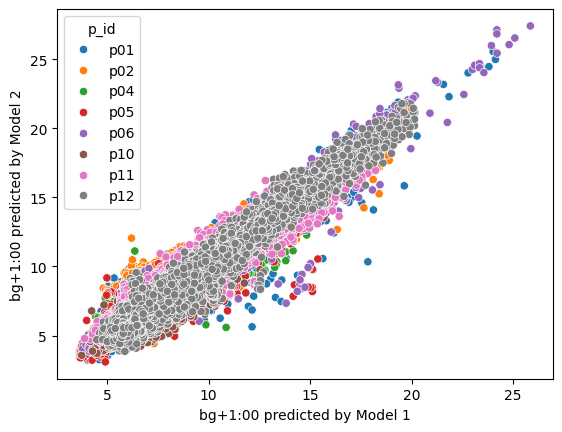

In [14]:
# Create a scatterplot of predicted bg+1:00
sns.scatterplot( 
    data = common_preds_df , 
    x = 'bg+1:00_pred_m1' , 
    y = 'bg+1:00_pred_m2' , 
    hue = 'p_id'
)

# Add labels and title
plt.xlabel('bg+1:00 predicted by Model 1')
plt.ylabel('bg+1:00 predicted by Model 2')

# Show the plot
plt.show()